In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.4/750.4 kB 9.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [5]:
from ultralytics import YOLO
import os
import cv2
import zipfile
import shutil
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import confusion_matrix

In [4]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!kaggle datasets download -d bharatsh001/pcos-cleaned-and-splitted
zipis=zipfile.ZipFile('/content/pcos-cleaned-and-splitted.zip')
zipis.extractall('/content')
zipis.extractall('/content/drive/MyDrive/PCOS_Image_Classification')
zipis.close()

 84% 49.0M/58.0M [00:01<00:00, 42.0MB/s]
100% 58.0M/58.0M [00:01<00:00, 37.8MB/s]


In [6]:
Dataset=os.path.join(os.getcwd(),"Dataset")

In [7]:
os.rename(os.path.join(Dataset,"Train"),os.path.join(Dataset,"train"))
os.rename(os.path.join(Dataset,"Test"),os.path.join(Dataset,"test"))

In [8]:
Train,Val=keras.preprocessing.image_dataset_from_directory('/content/Dataset/train',labels="inferred",label_mode="int",image_size=(256, 256),shuffle=True,seed=0,validation_split=0.2,subset='both' )
Test=keras.preprocessing.image_dataset_from_directory('/content/Dataset/test',labels="inferred",label_mode="int",image_size=(256, 256))

def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label

Found 1588 files belonging to 2 classes.
Using 1271 files for training.
Using 317 files for validation.
Found 398 files belonging to 2 classes.


In [9]:
Train=Train.map(process)
Val=Val.map(process)
Test=Test.map(process)

In [10]:
cnn=keras.Sequential([
    keras.layers.Conv2D(64,activation='relu',kernel_size=(3,3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2, padding="valid"),

    keras.layers.Conv2D(32,activation='relu',kernel_size=(3,3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2, padding="valid"),

    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')

])
cnn.build(input_shape=(1,256,256,3))
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (1, 254, 254, 64)         1792      
                                                                 
 max_pooling2d (MaxPooling2  (1, 127, 127, 64)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (1, 125, 125, 32)         18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (1, 62, 62, 32)           0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (1, 123008)               0         
                                                                 
 dense (Dense)               (1, 32)                   3

In [11]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
result=cnn.fit(Train,epochs=10,validation_data=Val)

Epoch 1/10
40/40 [==============================] - 14s 182ms/step - loss: 0.3724 - accuracy: 0.8718 - val_loss: 0.0494 - val_accuracy: 0.9874
Epoch 2/10
40/40 [==============================] - 5s 123ms/step - loss: 0.0210 - accuracy: 0.9945 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 3/10
40/40 [==============================] - 4s 80ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 4/10
40/40 [==============================] - 4s 83ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 5/10
40/40 [==============================] - 5s 109ms/step - loss: 7.9579e-04 - accuracy: 1.0000 - val_loss: 9.0571e-04 - val_accuracy: 1.0000
Epoch 6/10
40/40 [==============================] - 4s 79ms/step - loss: 4.1994e-04 - accuracy: 1.0000 - val_loss: 7.6063e-04 - val_accuracy: 1.0000
Epoch 7/10
40/40 [==============================] - 4s 80ms/step - loss: 3.0241e-04 - accuracy: 1.0000 - val_loss: 5.1084e-04 - val_ac

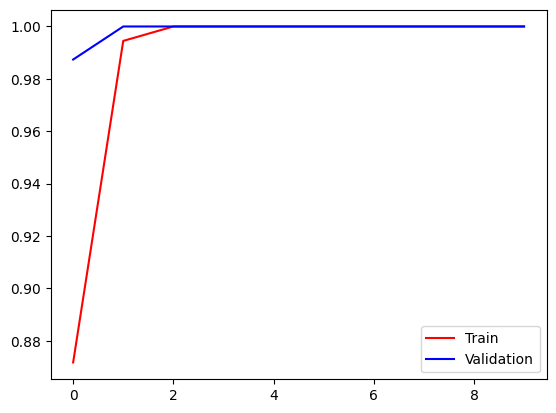

In [13]:
plt.plot(result.history['accuracy'],color='red',label='Train')
plt.plot(result.history['val_accuracy'],color='blue',label='Validation')
plt.legend()
plt.show()

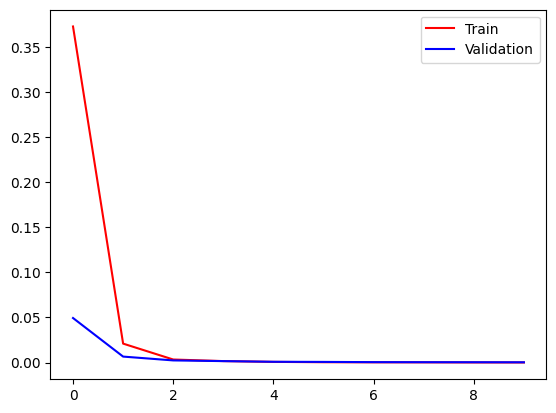

In [14]:
plt.plot(result.history['loss'],color='red',label='Train')
plt.plot(result.history['val_loss'],color='blue',label='Validation')
plt.legend()
plt.show()

In [15]:
cnn.save('/content/drive/MyDrive/PCOS_Image_Classification/model.keras')

In [16]:
Y_PRED=[]
Y_TEST=[]
for x,y in Test.take(20):
  yhat=cnn.predict(x)
  for i in range(len(yhat)):
    y_pred=yhat[i][0]
    y_original=y[i].numpy()

    if(y_pred>=0.5):
      temp=1
    else:
      temp=0
    Y_PRED.append(temp)
    Y_TEST.append(y_original)
    if(temp!=y_original):
      print(y_pred,"--> ",temp," compare with",y_original)

1/1 [==============================] - 1s 629ms/step


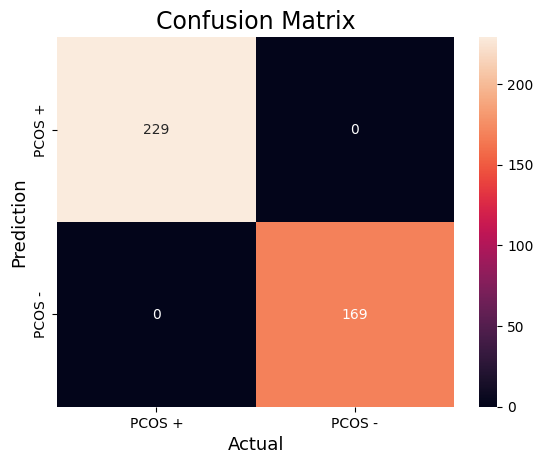

In [17]:
cm = confusion_matrix(Y_TEST,Y_PRED)
sns.heatmap(cm,
			annot=True,
			fmt='g',
			xticklabels=['PCOS +','PCOS -'],
			yticklabels=['PCOS +','PCOS -'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [18]:
accuracy,loss=cnn.evaluate(Test)

13/13 [==============================] - 1s 53ms/step - loss: 0.0011 - accuracy: 1.0000


# **IMPLEMENTING YOLO**

In [19]:
model=YOLO("yolov8n-cls.pt")

100%|██████████| 5.30M/5.30M [00:00<00:00, 79.3MB/s]


In [20]:
model.train(data=Dataset,epochs=50,imgsz=256)

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/Dataset, epochs=50, time=None, patience=100, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

100%|██████████| 6.23M/6.23M [00:00<00:00, 108MB/s]


AMP: checks passed ✅


train: Scanning /content/Dataset/train... 1588 images, 0 corrupt: 100%|██████████| 1588/1588 [00:00<00:00, 4924.73it/s]

train: New cache created: /content/Dataset/train.cache



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/Dataset/test... 398 images, 0 corrupt: 100%|██████████| 398/398 [00:00<00:00, 4539.03it/s]

val: New cache created: /content/Dataset/test.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 50 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/50     0.552G      0.693         16        256:   8%|▊         | 8/100 [00:01<00:14,  6.47it/s]

       1/50     0.552G     0.6873         16        256:  15%|█▌        | 15/100 [00:02<00:13,  6.16it/s]
100%|██████████| 755k/755k [00:00<00:00, 18.2MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  9.13it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00, 10.03it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00, 10.01it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  9.00it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  6.43it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  6.33it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.81it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.83it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.12it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      10/50     0.438G   0.004336          4        256: 100%|██████████| 100/100 [00:11<00:00,  8.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  6.45it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


      11/50     0.438G    0.00269          4        256: 100%|██████████| 100/100 [00:11<00:00,  8.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.63it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      12/50     0.438G   0.001004          4        256: 100%|██████████| 100/100 [00:11<00:00,  8.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.94it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      13/50     0.438G   0.001867          4        256: 100%|██████████| 100/100 [00:11<00:00,  8.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.72it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      14/50     0.438G   0.001196          4        256: 100%|██████████| 100/100 [00:12<00:00,  8.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.35it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      15/50     0.438G    0.00125          4        256: 100%|██████████| 100/100 [00:11<00:00,  8.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.77it/s]


                   all      0.997          1

      Epoch    GPU_mem       loss  Instances       Size


      16/50     0.436G   0.001046          4        256: 100%|██████████| 100/100 [00:12<00:00,  8.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.58it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      17/50     0.436G    0.01769          4        256: 100%|██████████| 100/100 [00:11<00:00,  8.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.98it/s]


                   all      0.997          1

      Epoch    GPU_mem       loss  Instances       Size


      18/50     0.436G   0.001279          4        256: 100%|██████████| 100/100 [00:11<00:00,  8.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.59it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      19/50     0.438G   0.001156          4        256: 100%|██████████| 100/100 [00:12<00:00,  8.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.92it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


      20/50     0.438G    0.01436          4        256: 100%|██████████| 100/100 [00:11<00:00,  8.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  5.71it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


      21/50     0.436G    0.00046          4        256: 100%|██████████| 100/100 [00:12<00:00,  8.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  6.03it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


      22/50     0.438G  0.0002572          4        256: 100%|██████████| 100/100 [00:12<00:00,  7.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  6.55it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


      23/50     0.438G  0.0005707          4        256: 100%|██████████| 100/100 [00:12<00:00,  8.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  6.89it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      24/50     0.438G  0.0003849          4        256: 100%|██████████| 100/100 [00:12<00:00,  8.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:02<00:00,  6.36it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      25/50     0.436G  0.0003858          4        256: 100%|██████████| 100/100 [00:12<00:00,  8.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  6.64it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      26/50     0.438G  0.0004562          4        256: 100%|██████████| 100/100 [00:12<00:00,  7.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  7.59it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      27/50     0.438G   0.000341          4        256: 100%|██████████| 100/100 [00:12<00:00,  7.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  7.60it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      28/50     0.438G  7.716e-05          4        256: 100%|██████████| 100/100 [00:12<00:00,  7.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  8.73it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      29/50     0.436G  9.754e-05          4        256: 100%|██████████| 100/100 [00:13<00:00,  7.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  8.18it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      30/50     0.438G  8.735e-05          4        256: 100%|██████████| 100/100 [00:13<00:00,  7.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  9.50it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      31/50     0.438G  0.0001425          4        256: 100%|██████████| 100/100 [00:12<00:00,  7.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  9.34it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      32/50     0.438G  0.0001152          4        256: 100%|██████████| 100/100 [00:12<00:00,  7.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  9.70it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      33/50     0.436G  4.337e-05          4        256: 100%|██████████| 100/100 [00:12<00:00,  7.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  9.09it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      34/50     0.438G  3.075e-05          4        256: 100%|██████████| 100/100 [00:12<00:00,  7.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  8.56it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      35/50     0.438G  5.343e-05          4        256: 100%|██████████| 100/100 [00:12<00:00,  7.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  9.30it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      36/50     0.436G  0.0002893          4        256: 100%|██████████| 100/100 [00:12<00:00,  7.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  9.01it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      37/50     0.436G  4.111e-05          4        256: 100%|██████████| 100/100 [00:12<00:00,  7.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  9.08it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      38/50     0.438G  0.0002052          4        256: 100%|██████████| 100/100 [00:13<00:00,  7.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  9.21it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      39/50     0.438G  2.085e-05          4        256: 100%|██████████| 100/100 [00:13<00:00,  7.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  8.81it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      40/50     0.436G  0.0001047          4        256: 100%|██████████| 100/100 [00:12<00:00,  7.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  9.57it/s]

                   all          1          1



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem       loss  Instances       Size


      41/50     0.577G  3.612e-05          4        256: 100%|██████████| 100/100 [00:13<00:00,  7.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  9.25it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      42/50     0.436G  0.0003677          4        256: 100%|██████████| 100/100 [00:12<00:00,  7.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  9.34it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      43/50     0.436G   0.001796          4        256: 100%|██████████| 100/100 [00:12<00:00,  7.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  9.97it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      44/50     0.438G  6.247e-05          4        256: 100%|██████████| 100/100 [00:12<00:00,  7.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  9.16it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      45/50     0.438G  8.202e-05          4        256: 100%|██████████| 100/100 [00:12<00:00,  7.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  9.83it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      46/50     0.438G   5.24e-05          4        256: 100%|██████████| 100/100 [00:12<00:00,  7.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  9.64it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      47/50     0.438G  9.551e-05          4        256: 100%|██████████| 100/100 [00:13<00:00,  7.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  9.59it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      48/50     0.436G  0.0005305          4        256: 100%|██████████| 100/100 [00:12<00:00,  7.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  9.25it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      49/50     0.436G    0.01041          4        256: 100%|██████████| 100/100 [00:12<00:00,  7.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  9.54it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      50/50     0.436G   0.008603          4        256: 100%|██████████| 100/100 [00:12<00:00,  7.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  9.21it/s]

                   all          1          1



50 epochs completed in 0.206 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/Dataset/train... found 1588 images in 2 classes ✅ 
val: None...
test: /content/Dataset/test... found 398 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 13/13 [00:01<00:00,  7.15it/s]


                   all          1          1
Speed: 0.2ms preprocess, 1.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d88adcde080>
curves: []
curves_results: []
fitness: 1.0
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 1.0, 'metrics/accuracy_top5': 1.0, 'fitness': 1.0}
save_dir: PosixPath('runs/classify/train')
speed: {'preprocess': 0.22088462982944507, 'inference': 0.9785776761308986, 'loss': 0.0006876998211271199, 'postprocess': 0.000500798824444488}
task: 'classify'
top1: 1.0
top5: 1.0

In [21]:
shutil.copytree('/content/runs','/content/drive/MyDrive/PCOS_Image_Classification/runs')

'/content/drive/MyDrive/PCOS_Image_Classification/runs'

AxesImage(size=(1024, 1024))


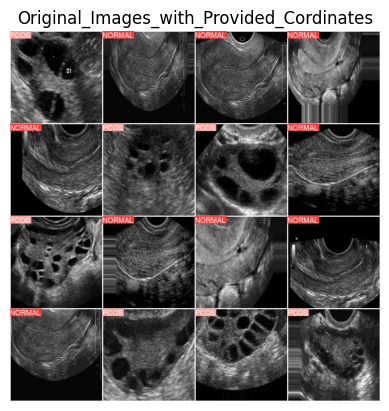

In [22]:
# Original Images with Provided Cordinates
validation_Images_1=cv2.imread(os.path.join(os.getcwd(),"runs","classify","train","val_batch0_labels.jpg"))
plt.title("Original_Images_with_Provided_Cordinates")
plt.axis('off')
print(plt.imshow(validation_Images_1[:,:,::-1]))

AxesImage(size=(1024, 1024))


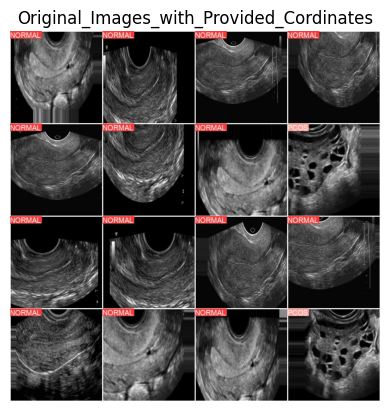

In [23]:
# Original Images with Provided Cordinates
validation_Images_1=cv2.imread(os.path.join(os.getcwd(),"runs","classify","train","val_batch1_labels.jpg"))
plt.title("Original_Images_with_Provided_Cordinates")
plt.axis('off')
print(plt.imshow(validation_Images_1[:,:,::-1]))

AxesImage(size=(2250, 3000))


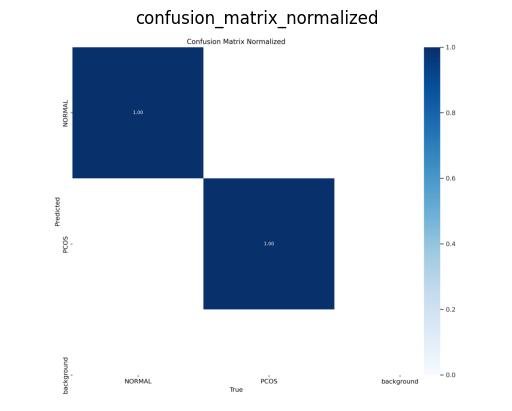

In [24]:
#Confusion Matrix
confusion_matrix_normalized=cv2.imread(os.path.join(os.getcwd(),"runs","classify","train","confusion_matrix_normalized.png"))
plt.title("confusion_matrix_normalized")
plt.axis('off')
print(plt.imshow(confusion_matrix_normalized[:,:,::-1]))

AxesImage(size=(1200, 1200))


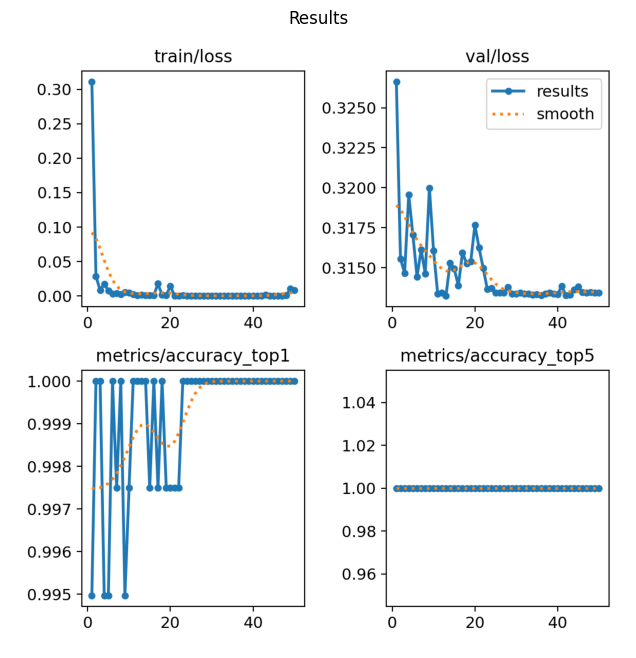

In [25]:
# Result
plt.rcParams["figure.figsize"] = (12, 8)
results=cv2.imread(os.path.join(os.getcwd(),"runs","classify","train","results.png"))

plt.title("Results")
plt.axis('off')
print(plt.imshow(results[:,:,::-1]))